In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [66]:
data=pd.read_csv("/content/schizophrenia_dataset.csv")
data.head(),data.info
data=data.rename(columns={'Hasta_ID':'Patient_ID','Yaş':"Age","Cinsiyet":"Gender","Eğitim_Seviyesi":'Education_Level',
                          "Medeni_Durum":'Marital_Status','Meslek':"Occupation",'Gelir_Düzeyi':"Income_Level",
                          'Yaşadığı_Yer':'Living_Area','Tanı':'Diagnosis','Hastalık_Süresi':'Disease_Duration',
                          'Hastaneye_Yatış_Sayısı':'Hospitalizations',
                          'Ailede_Şizofreni_Öyküsü':'Family_History',"Madde_Kullanımı":"Substance_Use",
                          "İntihar_Girişimi":"Suicide_Attempt","Pozitif_Semptom_Skoru":"Positive_Symptom_Score",
                          "Negatif_Semptom_Skoru":"Negative_Symptom_Score","GAF_Skoru":"GAF_Score","Sosyal_Destek":"Social_Support",
                          "Stres_Faktörleri":"Stress_Factors","İlaç_Uyumu":"Medication_Adherence"})

In [67]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Education_Level', 'Marital_Status',
       'Occupation', 'Income_Level', 'Living_Area', 'Diagnosis',
       'Disease_Duration', 'Hospitalizations', 'Family_History',
       'Substance_Use', 'Suicide_Attempt', 'Positive_Symptom_Score',
       'Negative_Symptom_Score', 'GAF_Score', 'Social_Support',
       'Stress_Factors', 'Medication_Adherence'],
      dtype='object')

In [68]:
data.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Education_Level,0
Marital_Status,0
Occupation,0
Income_Level,0
Living_Area,0
Diagnosis,0
Disease_Duration,0


#Exploratory Data Analysis

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Patient_ID              10000 non-null  int64
 1   Age                     10000 non-null  int64
 2   Gender                  10000 non-null  int64
 3   Education_Level         10000 non-null  int64
 4   Marital_Status          10000 non-null  int64
 5   Occupation              10000 non-null  int64
 6   Income_Level            10000 non-null  int64
 7   Living_Area             10000 non-null  int64
 8   Diagnosis               10000 non-null  int64
 9   Disease_Duration        10000 non-null  int64
 10  Hospitalizations        10000 non-null  int64
 11  Family_History          10000 non-null  int64
 12  Substance_Use           10000 non-null  int64
 13  Suicide_Attempt         10000 non-null  int64
 14  Positive_Symptom_Score  10000 non-null  int64
 15  Negative_Symptom_Sco

In [70]:
data.describe()

,Patient_ID,Age,Gender,Education_Level,Marital_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_Use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.867700,0.502600,3.042600,1.518200,1.510600,0.996900,0.499400,0.288700,5.859000,1.440300,0.319600,0.217700,0.08840,39.019000,39.4614,67.031800,0.992500,0.998700,1.137500
std,2886.89568,18.215054,0.500018,1.423021,1.117315,1.114097,0.817531,0.500025,0.453181,11.066814,2.824152,0.466345,0.412703,0.28389,27.276962,27.0175,23.999833,0.813578,0.817169,0.821378
min,1.00000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,10.000000,0.000000,0.000000,0.000000
25%,2500.75000,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,18.0000,54.000000,0.000000,0.000000,0.000000
50%,5000.50000,49.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,35.0000,72.000000,1.000000,1.000000,1.000000
75%,7500.25000,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,5.250000,1.000000,1.000000,0.000000,0.00000,57.000000,57.0000,86.000000,2.000000,2.000000,2.000000
max,10000.00000,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,40.000000,10.000000,1.000000,1.000000,1.00000,100.000000,100.0000,100.000000,2.000000,2.000000,2.000000


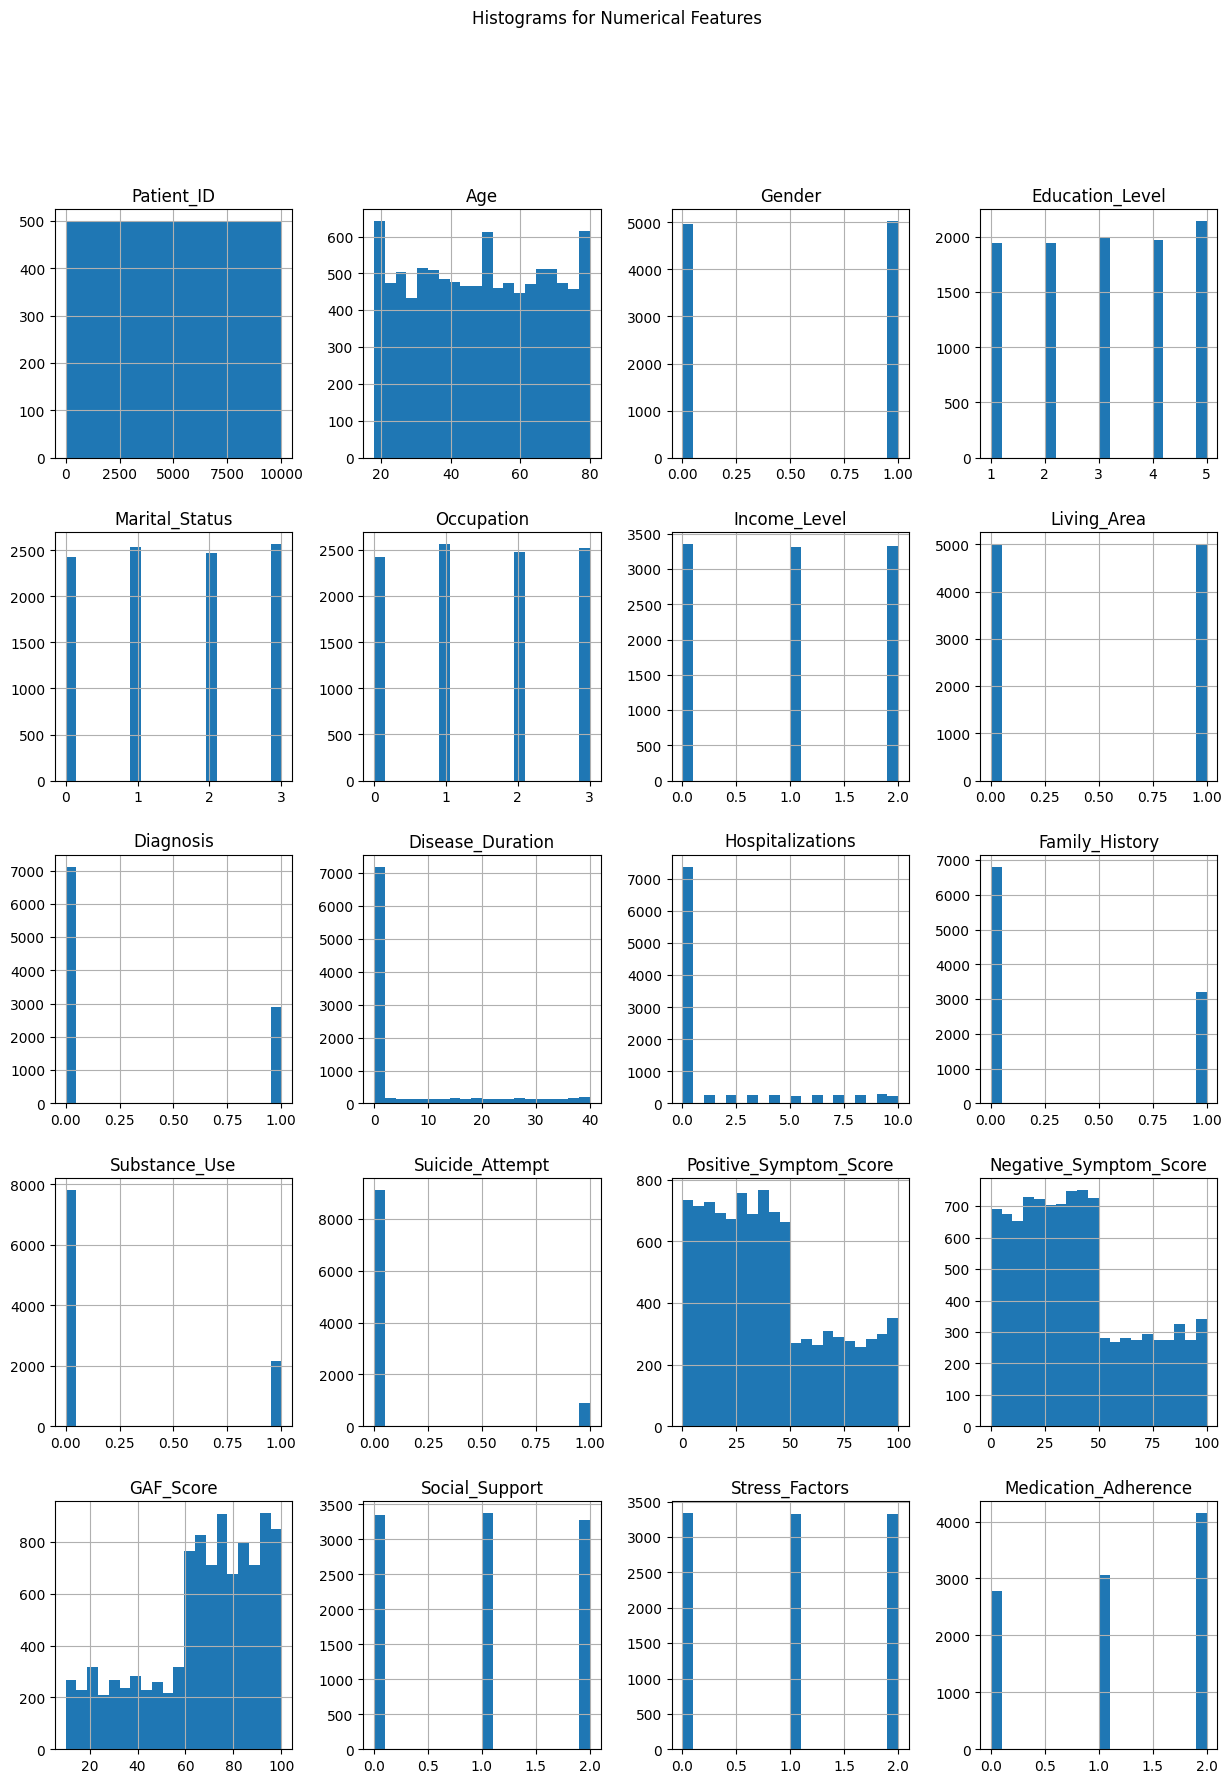

In [71]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns].hist(figsize=(15, 20), bins=20)
plt.suptitle("Histograms for Numerical Features")
plt.show()


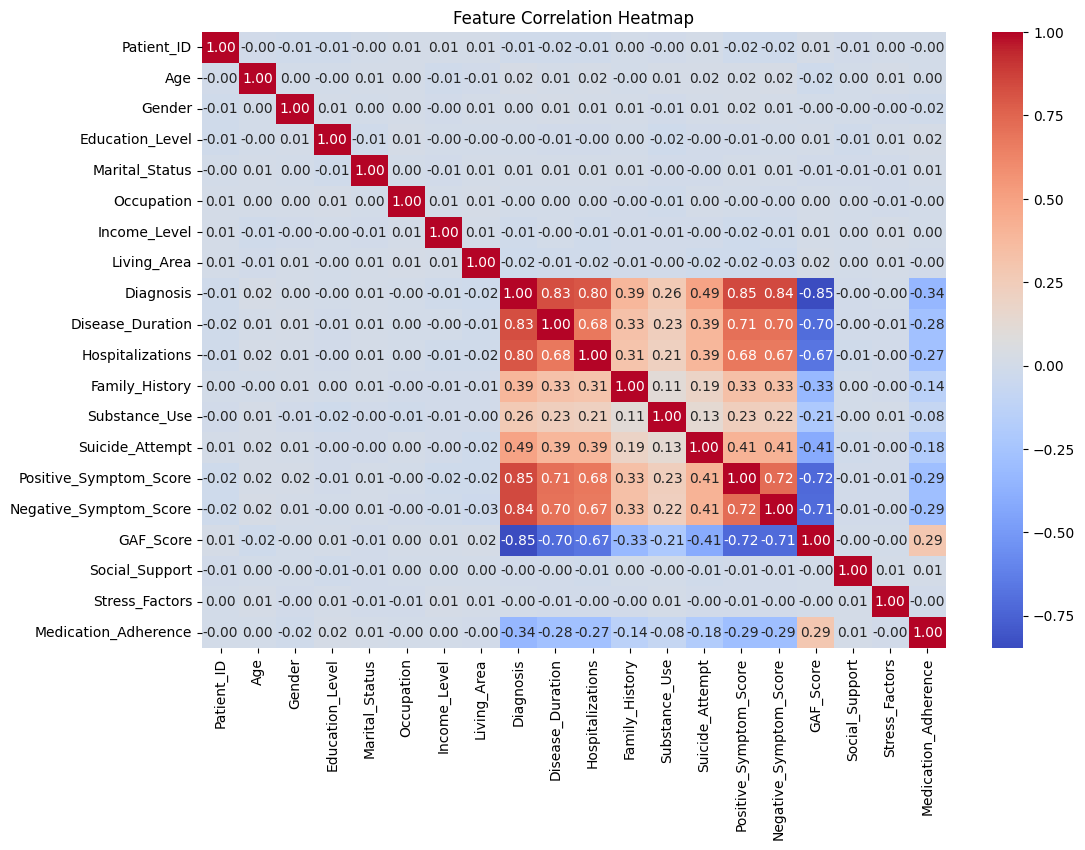

In [72]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


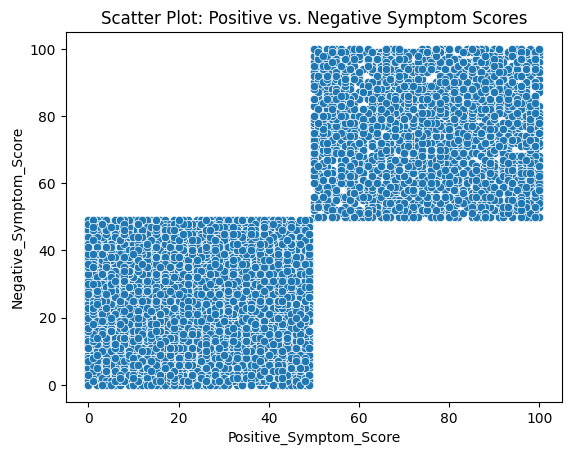

In [73]:
sns.scatterplot(x=data['Positive_Symptom_Score'], y=data['Negative_Symptom_Score'])
plt.title("Scatter Plot: Positive vs. Negative Symptom Scores")
plt.show()



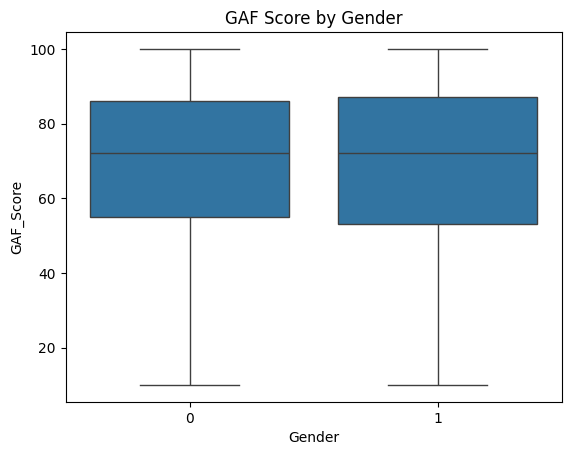

In [74]:
sns.boxplot(x=data['Gender'], y=data['GAF_Score'])
plt.title("GAF Score by Gender")
plt.show()


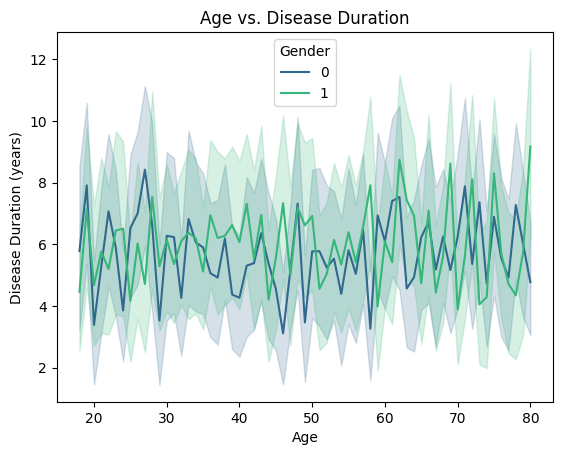

In [75]:
sns.lineplot(data=data, x='Age', y='Disease_Duration', hue='Gender', palette='viridis')
plt.title("Age vs. Disease Duration")
plt.xlabel("Age")
plt.ylabel("Disease Duration (years)")

plt.show()


- Females are less likely to have schizo in their early years compared to men whereas in the later years(45-80) they tend to have a longer disease_duration

Text(0, 0.5, 'Number of Hospitalizations')

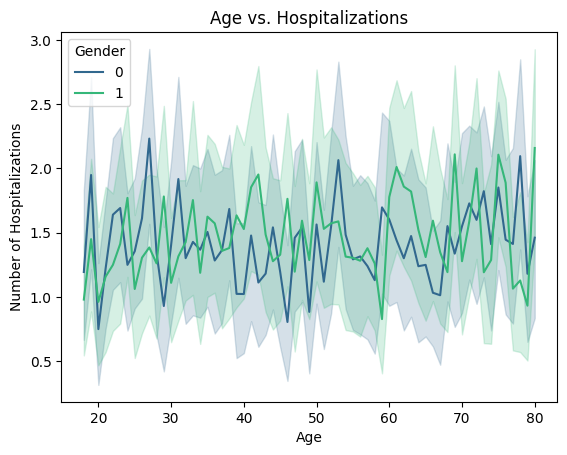

In [76]:
sns.lineplot(data=data, x='Age', y='Hospitalizations', hue='Gender', palette='viridis')
plt.title("Age vs. Hospitalizations")
plt.xlabel("Age")
plt.ylabel("Number of Hospitalizations")



- Number of hospitalizations for women peak around the age of 30
- For men, it is around the age of 40, and again around the age of 68-69.


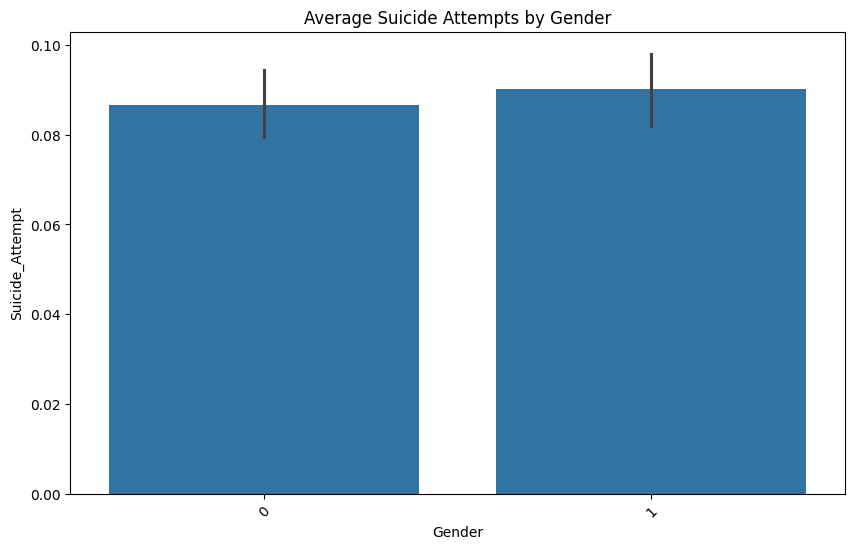

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Suicide_Attempt', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Suicide Attempts by Gender")
plt.show()


- Men do more attempts.

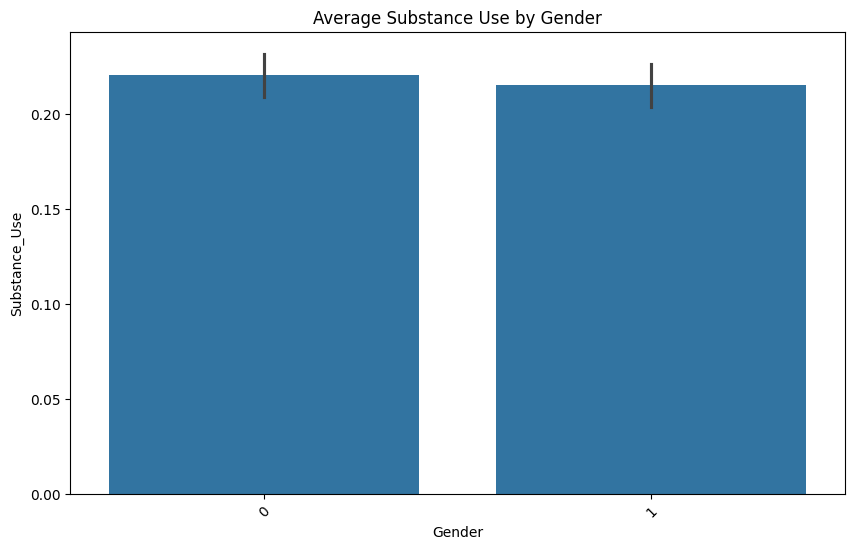

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Substance_Use', data=data, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Substance Use by Gender")
plt.show()


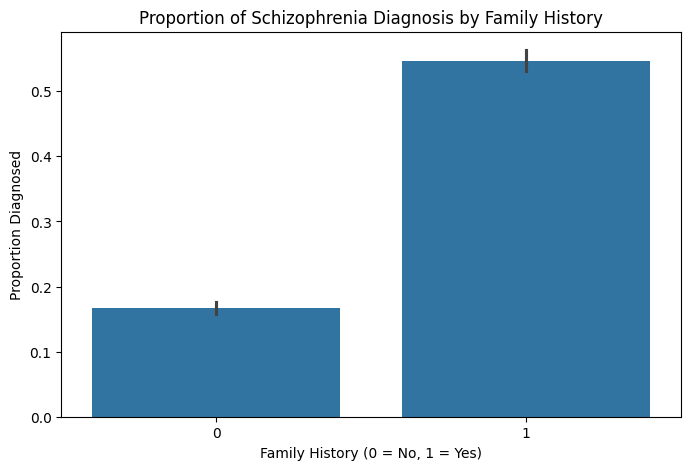

In [79]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Family_History', y='Diagnosis', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Proportion of Schizophrenia Diagnosis by Family History")
plt.xlabel("Family History (0 = No, 1 = Yes)")
plt.ylabel("Proportion Diagnosed")
plt.show()


In [80]:
data[['Family_History', 'Diagnosis']].corr()


,Family_History,Diagnosis
Family_History,1.000000,0.390557
Diagnosis,0.390557,1.000000


There exists a weak correlation between the two.

In [88]:
transform_features = ["Disease_Duration","Hospitalizations","Positive_Symptom_Score","Negative_Symptom_Score","GAF_Score"]


In [89]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=24)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[transform_features] =  scaler.fit_transform(X_train[transform_features])
X_test[transform_features] =  scaler.transform(X_test[transform_features])


In [91]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return acc, f1 , precision, recall, roc_auc
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}


In [93]:
def evaluate_models(X_train, y_train,X_test,y_test,models):

    models_list = []
    precision_list = []
    recall_list = []
    f1_score_list = []
    auc= []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train)


        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        precision_list.append(model_test_precision)
        recall_list.append(model_test_recall)
        f1_score_list.append(model_test_f1)
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')

    report=pd.DataFrame(list(zip(models_list, precision_list, recall_list, f1_score_list)), columns=['Model Name', 'Precision','Recall','F1-score']).sort_values(by=['Recall'], ascending=False)

    return report


In [94]:
evaluate_models(X_train,y_train,X_test,y_test,models)


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Gradient Boosting
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.7761
- F1 score: 0.4896
- Precision: 0.7164
- Recall: 0.3719
- Roc Auc Score: 0.6561
----------------------------------
Model performance for Test set
- Accuracy: 0.6800
- F1 score: 0.2344
- Precision: 0.3784
- Recall: 0.1698
- Roc Auc Score: 0.5284


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


Support Vector Classifier
Model performa

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model Name,Precision,Recall,F1-score
0,Random Forest,1.000000,1.000000,1.00000
1,Decision Tree,1.000000,1.000000,1.00000
2,Gradient Boosting,1.000000,1.000000,1.00000
3,Logistic Regression,1.000000,1.000000,1.00000
5,XGBClassifier,1.000000,1.000000,1.00000
7,AdaBoost Classifier,1.000000,1.000000,1.00000
4,K-Neighbors Classifier,0.378378,0.169844,0.23445
6,Support Vector Classifier,0.000000,0.000000,0.00000


In [95]:
xgboost_params = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
}
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ("RF", RandomForestClassifier(), rf_params),
]


In [96]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 60 candidates, totalling 180 fits
---------------- Best Params for XGBoost -------------------
{'min_child_weight': 1, 'max_depth': 3}
---------------- Best Params for RF -------------------
{'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}


In [97]:
model_param

{'XGBoost': {'min_child_weight': 1, 'max_depth': 3},
 'RF': {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 10}}

In [98]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Random Forest Classifier": RandomForestClassifier(**model_param['RF']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'],n_jobs=-1),
}
tuned_report =evaluate_models(X_train,y_train,X_test,y_test,models=best_models)


Random Forest Classifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000


XGBClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000




In [100]:
best_model = RandomForestClassifier(**model_param['RF'])
best_model = best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print("FINAL MODEL 'RF'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)


FINAL MODEL 'RF'
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1423
           1       1.00      1.00      1.00       577

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



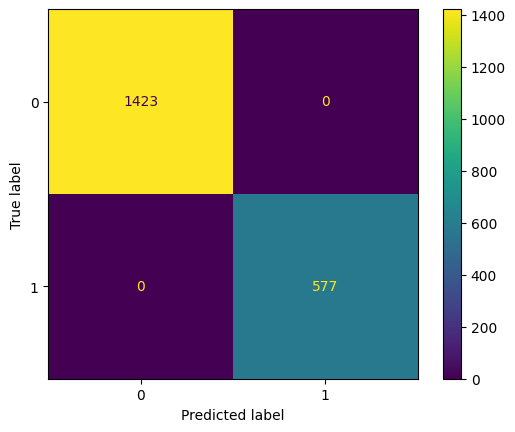

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)


Inspite of having imbalance dataset the model is able to classify minority cases with 0 false positives and True negatives.